In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/data.csv")
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
df = df.dropna()
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [5]:
X = df.iloc[:,:-1] ##Independent
y = df.iloc[:,-1]  ## Dependent

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


# KNN Regressor

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [9]:
regressor.score(X_train,y_train)

1.0

In [10]:
regressor.score(X_test,y_test)

0.5417545333477789

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [12]:
score.mean()

0.39387489016756577

# Hyperparameter Tuning

In [14]:


accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

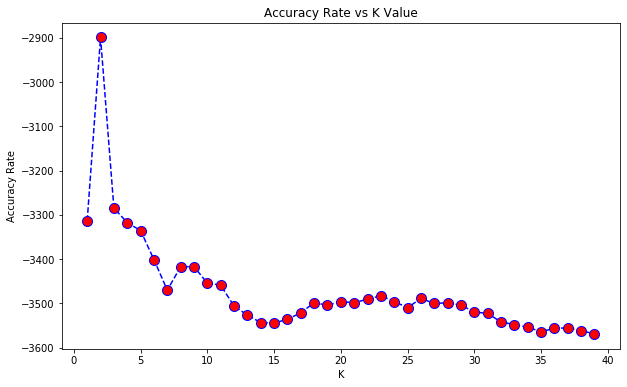

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title("Accuracy Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy Rate")

In [16]:
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [17]:
from sklearn import metrics
import numpy as np

print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("SMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 26.46491361788618
MSE: 3282.779510713076
SMSE: 57.295545295538254


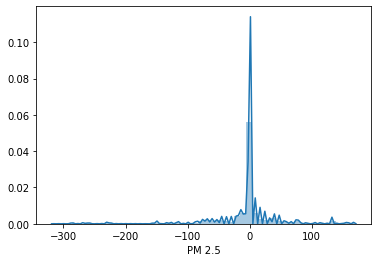

In [20]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [21]:
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [22]:
from sklearn import metrics
import numpy as np

print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("SMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 34.972675304878045
MSE: 2970.1032238207154
SMSE: 54.4986534129121


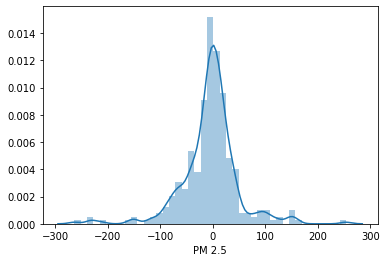

In [23]:
import seaborn as sns
sns.distplot(y_test-prediction)